In [16]:
#importing librarys
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input
from keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.utils import to_categorical

In [17]:
data = pd.read_csv(r"/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv").astype('float32')

In [18]:
print(data)

           0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  \
0        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   
372445  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372446  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372447  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372448  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
372449  25.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

        0.641  0.642  0.643  0.644  0.6

In [19]:
X = data.drop('0',axis = 1)
y = data['0']


train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

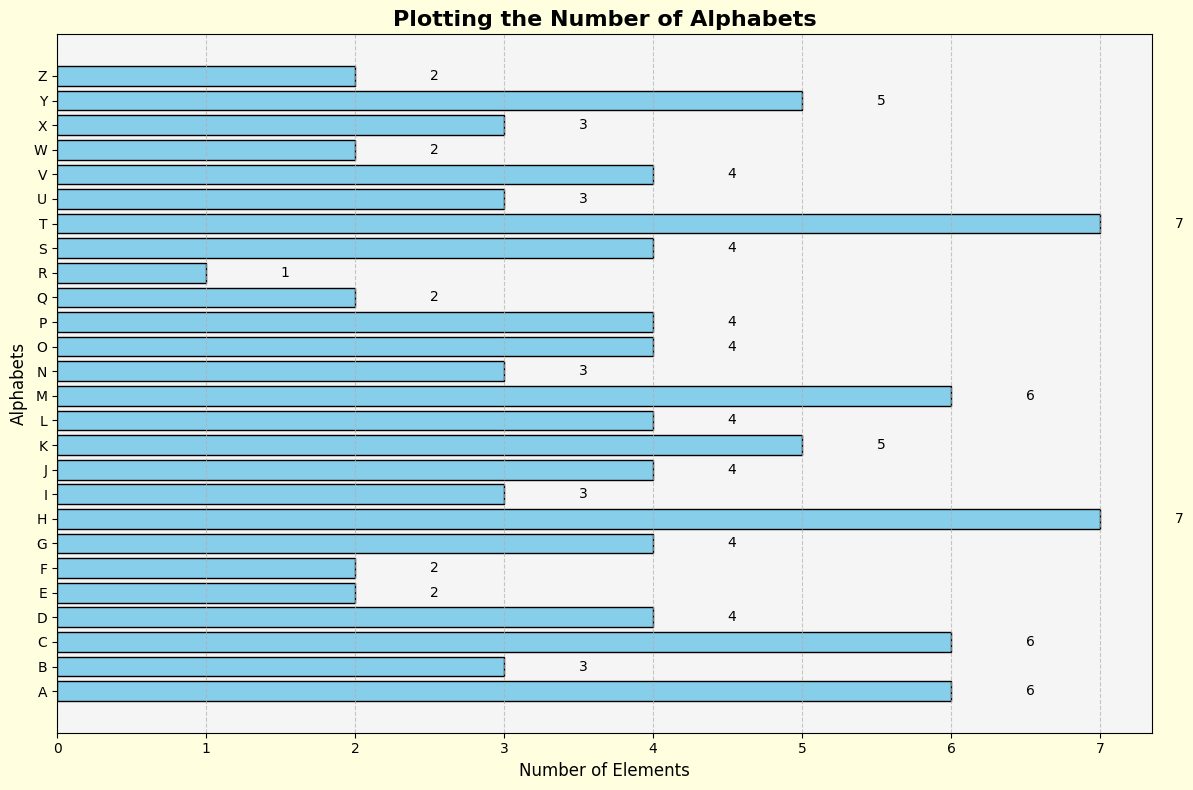

In [20]:
word_dict = {i: chr(65 + i) for i in range(26)}  #{0:A,1:B,..,25:Z}

y = np.random.randint(0, 26, size=100)

#count ocurences of alphabetss
y_int = np.intp(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] += 1
#laabaaels for aalphabets
alphabets = list(word_dict.values())

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.barh(alphabets, count, color='skyblue', edgecolor='black')

for bar in bars:
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
            str(bar.get_width()), va='center', fontsize=10, color='black')

ax.set_title("Plotting the Number of Alphabets", fontsize=16, fontweight='bold')
ax.set_xlabel("Number of Elements", fontsize=12)
ax.set_ylabel("Alphabets", fontsize=12)
ax.grid(axis='x', linestyle='--', alpha=0.7)
fig.patch.set_facecolor('lightyellow')
ax.set_facecolor('whitesmoke')
plt.tight_layout()
plt.show()

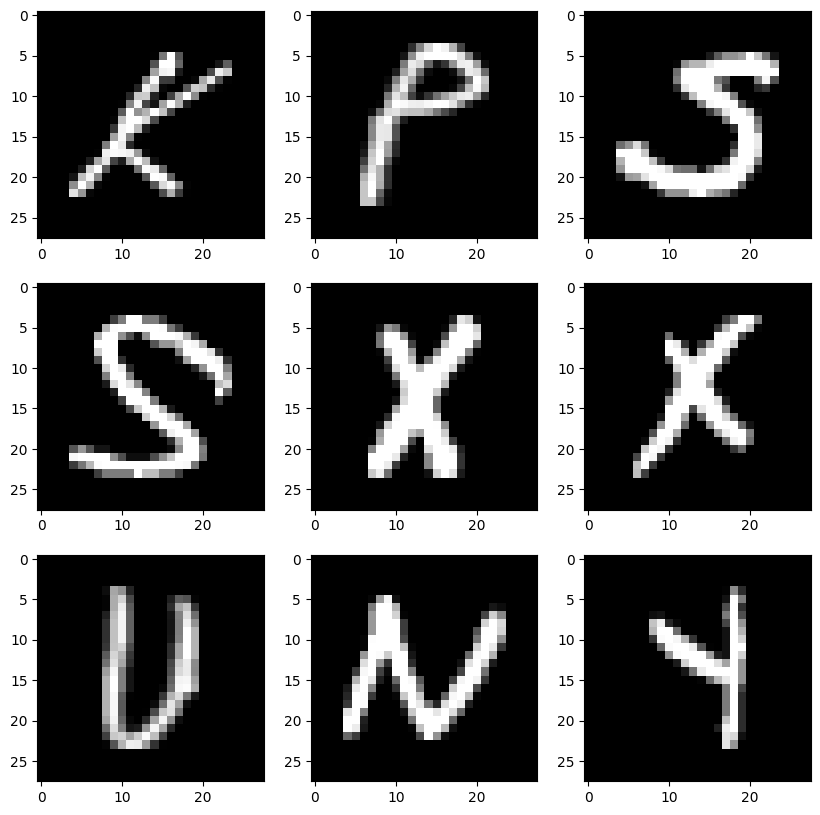

In [21]:
shuff = shuffle(train_x[:100])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap=plt.get_cmap('gray'))
plt.show()

In [22]:
#reshape data for model creation
train_X = train_x.reshape(train_x.shape[0], train_x.shape[1], train_x.shape[2], 1)
print("reshaped train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)
print("reshaped test data: ", test_X.shape)

#Convert labels to one-hot encoding
train_Y = to_categorical(train_y, num_classes=26).astype('int')  
print("reshaped train labels: ", train_Y.shape)
test_Y = to_categorical(test_y, num_classes=26).astype('int')  
print("reshaped test labels: ", test_Y.shape)

reshaped train data:  (297960, 28, 28, 1)
reshaped test data:  (74490, 28, 28, 1)
reshaped train labels:  (297960, 26)
reshaped test labels:  (74490, 26)


In [23]:
#Model
model = Sequential([
    Input(shape=(28, 28, 1)),  
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(26, activation="softmax")
])
#Model Compile
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 137,178 (535.85 KB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
#Model fitting
history = model.fit(train_X, train_Y, 
                    epochs=5,
                    validation_data = (test_X,test_Y))

Epoch 1/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9872 - loss: 0.0480 - val_accuracy: 0.9801 - val_loss: 0.0766
Epoch 2/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9873 - loss: 0.0495 - val_accuracy: 0.9853 - val_loss: 0.0658
Epoch 3/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9885 - loss: 0.0464 - val_accuracy: 0.9852 - val_loss: 0.0665
Epoch 4/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9886 - loss: 0.0463 - val_accuracy: 0.9845 - val_loss: 0.0644
Epoch 5/5
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step - accuracy: 0.9891 - loss: 0.0449 - val_accuracy: 0.9852 - val_loss: 0.0651


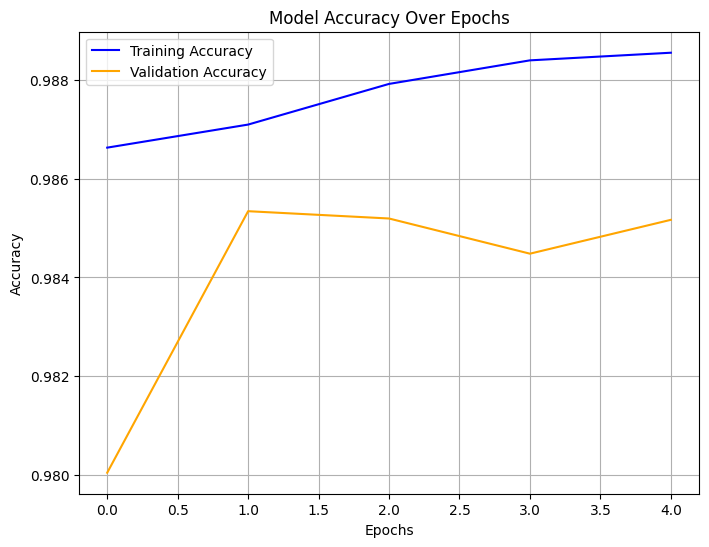

In [31]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.figure(figsize=(8, 6))
plt.plot(train_accuracy, label='Training Accuracy', color='blue')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

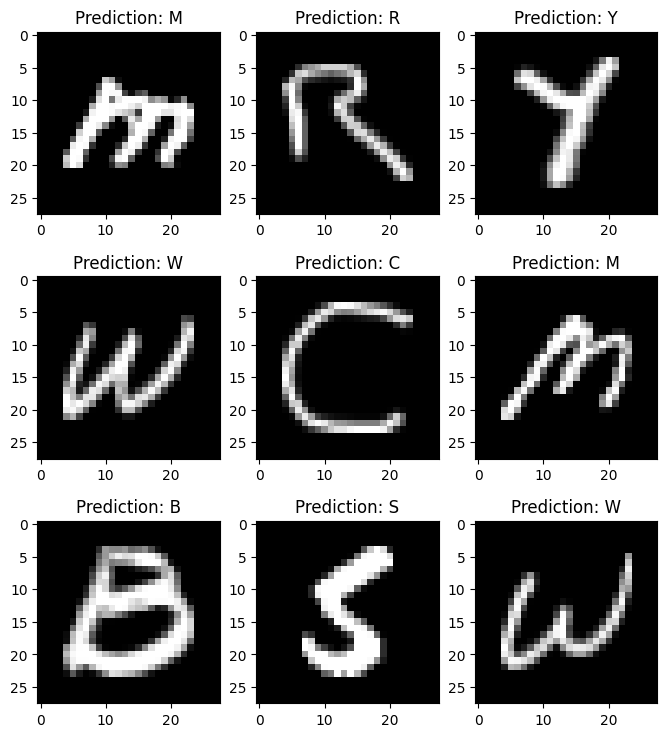

In [33]:
#pred on test data
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img,  cmap=plt.get_cmap('gray'))
    
    pred = word_dict[np.argmax(test_Y[i])]
    ax.set_title("Prediction: "+pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


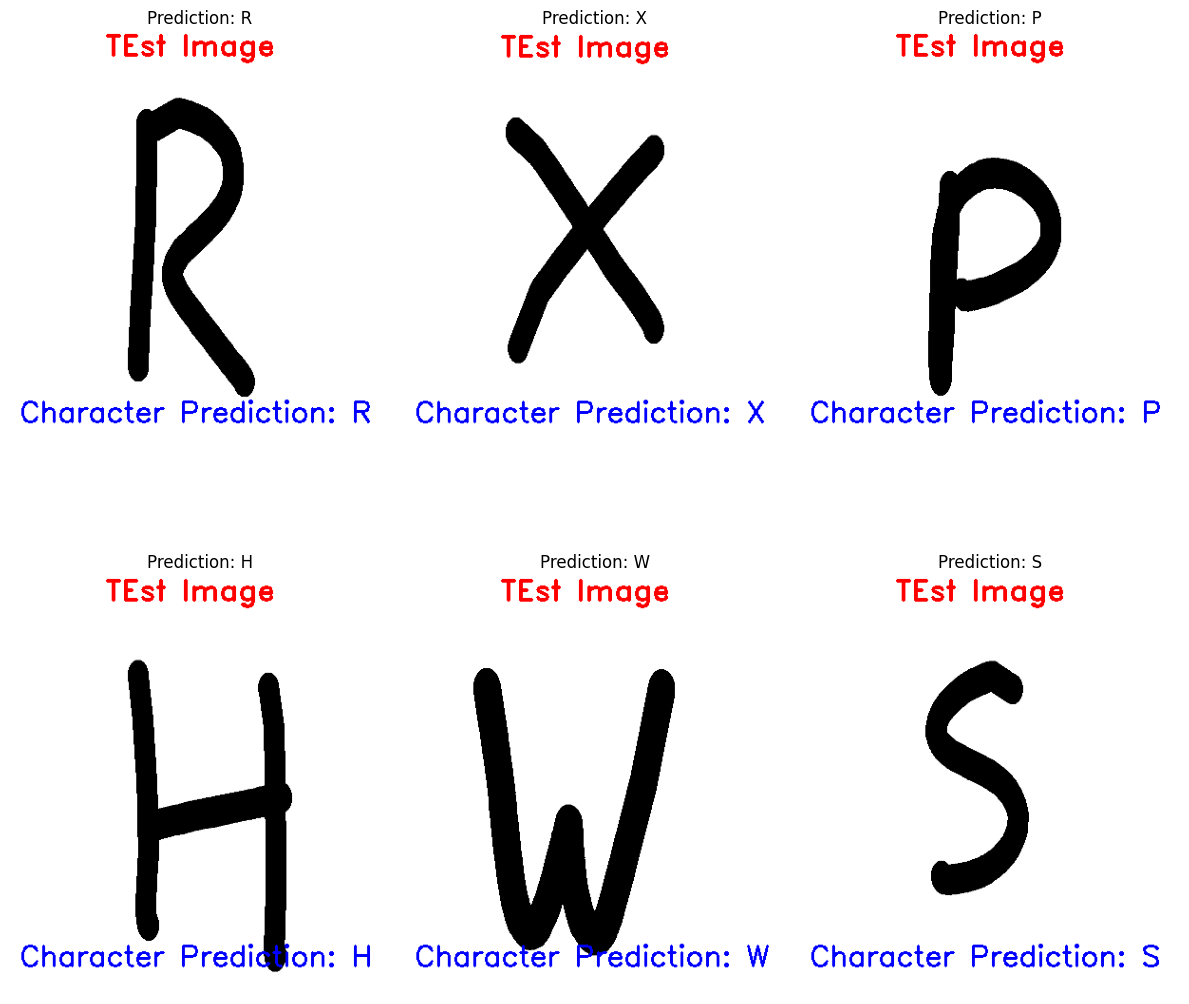

In [45]:
image_paths = [
    '/kaggle/input/externel-test-data/R_caps.009.png',
    '/kaggle/input/externel-test-data/X_caps.014.png',
    '/kaggle/input/externel-test-data/p.023.png', 
    '/kaggle/input/externel-test-data/H_caps.003.png',
    '/kaggle/input/externel-test-data/W_caps.001.png',
    '/kaggle/input/externel-test-data/S_caps.010.png'  
]

plt.figure(figsize=(12, 12))
for idx, img_path in enumerate(image_paths):
    img = cv2.imread(img_path)
    img_copy = img.copy()
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
    img = cv2.resize(img, (400, 440)) 

    img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)  #Gaussian Blur
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)  # grayscale
    _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
    img_final = cv2.resize(img_thresh, (28, 28))  #image28x28
    img_final = np.reshape(img_final, (1, 28, 28, 1))  #reshape forprediction

    #prediction
    img_pred = word_dict[np.argmax(model.predict(img_final))]

    cv2.putText(img, "TEst Image", (100, 25), cv2.FONT_HERSHEY_DUPLEX, fontScale=1, thickness=2, color=(255, 0, 0))
    cv2.putText(img, f"Character Prediction: {img_pred}", (10, 410), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, thickness=2, color=(0, 0, 255))
    plt.subplot(2, 3, idx + 1)  #2x3 grid
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {img_pred}")

plt.tight_layout()
plt.show()

In [46]:
model_json=model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)
model.save_weights("model.weights.h5")